In [1]:
import pandas as pd
import plotly.express as px
import plotly as py

In [26]:
df = pd.read_csv("data_viz_species_data.csv")
df["count"] = 1
df_count = df.groupby(["FAMILY"]).count()
df_count = df_count[["count"]]
df_count = df_count.reset_index()
df_count.sort_

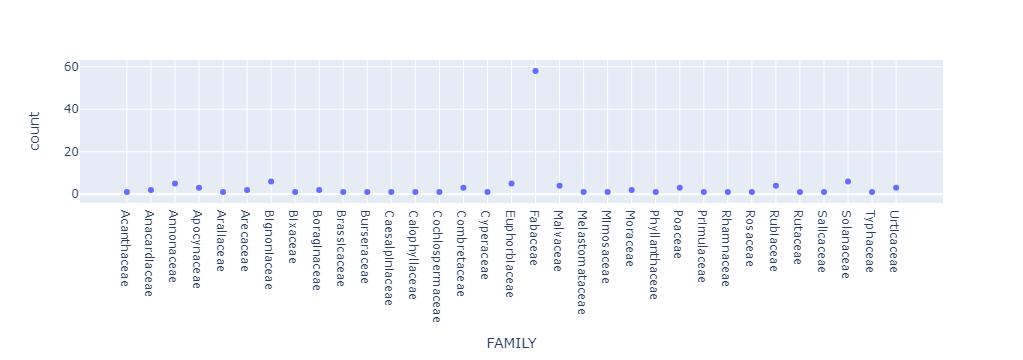

In [27]:
fig = px.scatter(df_count, x="FAMILY", y="count")
fig.show()